<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BHT3%5DExample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Election Scenario

* Candidate A won the state by an average of 4% points, however they lost District 29 to candidate B by 22%, making it a significant outlier. 
* The final results for the distrct are 39% Candidate A, 61% Candidate B. 
* You are tasked to investigate this to determine if it is worth a thorough follow-up.
* You call a a hundred members of the general public who reported as voting. 48 out of the 100 reported voting for Candidate A. 
* What do you report?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

But what question are we actually wanting to answer? Maybe this is a good one:

*What is the chance that more than Candidate A got more votes than reported?*

Or to put this another way: 
* Null Hypothesis - 39% of votes went to Candidate A and 61% to Candidate B
* Alternative Hypothesis - >39% of votes went to Candidate A and <61% to Candidate B

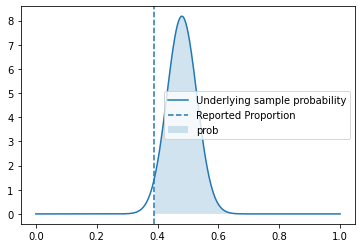

In [ ]:
sigma = np.sqrt(0.39 * 0.61 / 100)
reported = 0.39
sample = 0.48

xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, sample, sigma)
plt.plot(xs, ps, label="Underlying sample probability")
plt.axvline(reported, ls="--", label="Reported Proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs>=reported, label="prob")
plt.legend();

All the above plot tells us is that things might indeed look fishy. But lets look into the CDF for specifics and then quantify the probability.

In [ ]:
prob_more = norm.sf(reported, sample, sigma)
print(f"There is a {100 * prob_more:.1f}% chance that Candidate A would have received more votes")

There is a 96.7% chance that Candidate A would have received more votes


If we want to phrase this in terms of z-scores for a one-tail test and checking if we have a p-value of < 0.05

In [ ]:
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.95)
print(f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f}, so we are significant")
print(f"Have p-value {norm.sf(sample, reported, sigma):.3f}")

1.845 is larger than 1.645, so we are significant
Have p-value 0.033


So what does this mean? We should probably tell our supervisors that this is a significant result (p < 0.05) and warrants a deeper investigation.

Follow up: What if instead of asking *What is the chance that more than Candidate A got more votes than reported?*, we instead asked *What is the chance that more than Candidate A got a significantly different amount of votes than reported?*

Ie we now move from the one-tail case to the two-tailed? Let's continue assuming someone has asked if it meets $p = 0.05$ criteria

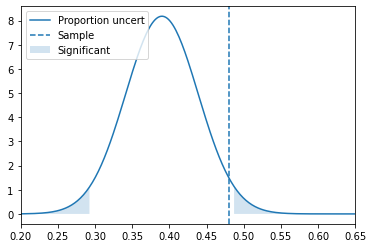

In [ ]:
xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, reported, sigma)

plt.plot(xs, ps, label="Proportion uncert")
plt.axvline(sample, ls="--", label="Sample")
limits = norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha=0.2, where=(xs<limits[0])|(xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);

So it looks like it's not $p<0.05$ significant for the two-tailed case. Or more formally:

In [ ]:
# Using z-scores
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975)
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# Using p-values
p_value_two_tailed = 2 * norm.sf(z_score)
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05
